In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing as pp
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from statistics import mode
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

#Todas las librerías para los distintos algoritmos
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.svm import OneClassSVM
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
import statistics
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

In [2]:
data_train= pd.read_csv("./datos/train.csv",na_values=["?"])
data_test= pd.read_csv("./datos/test.csv",na_values=["?"])
data_trainCopia = data_train.copy()
data_testCopia = data_test.copy()

Nombre = LabelEncoder().fit(pd.read_csv("./datos/nombre.csv").Nombre)
Año = LabelEncoder().fit(pd.read_csv("./datos/ao.csv").Año)
Ciudad = LabelEncoder().fit(pd.read_csv("./datos/ciudad.csv").Ciudad)
Combustible = LabelEncoder().fit(pd.read_csv("./datos/combustible.csv").Combustible)
Consumo = LabelEncoder().fit(pd.read_csv("./datos/consumo.csv").Consumo)
Descuento = LabelEncoder().fit(pd.read_csv("./datos/descuento.csv").Descuento)
Kilometros = LabelEncoder().fit(pd.read_csv("./datos/kilometros.csv").Kilometros)
Mano = LabelEncoder().fit(pd.read_csv("./datos/mano.csv").Mano)
Potencia = LabelEncoder().fit(pd.read_csv("./datos/potencia.csv").Potencia)
Asientos = LabelEncoder().fit(pd.read_csv("./datos/asientos.csv").Asientos)
Motor_CC=LabelEncoder().fit(pd.read_csv("./datos/motor_cc.csv").Motor_CC)
Tipo_marchas=LabelEncoder().fit(pd.read_csv("./datos/Tipo_marchas.csv").Tipo_marchas)

data_trainCopia['Nombre']=data_trainCopia['Nombre'].fillna(mode(data_trainCopia['Nombre']))
data_trainCopia['Año']=data_trainCopia['Año'].fillna(mode(data_trainCopia['Año']))
data_trainCopia['Ciudad']=data_trainCopia['Ciudad'].fillna(mode(data_trainCopia['Ciudad']))
data_trainCopia['Kilometros']=data_trainCopia['Kilometros'].fillna(mode(data_trainCopia['Kilometros']))
data_trainCopia['Combustible']=data_trainCopia['Combustible'].fillna(mode(data_trainCopia['Combustible']))
data_trainCopia['Tipo_marchas']=data_trainCopia['Tipo_marchas'].fillna(mode(data_trainCopia['Tipo_marchas']))
data_trainCopia['Mano']=data_trainCopia['Mano'].fillna(mode(data_trainCopia['Mano']))
data_trainCopia['Consumo']=data_trainCopia['Consumo'].fillna(mode(data_trainCopia['Consumo']))
data_trainCopia['Motor_CC']=data_trainCopia['Motor_CC'].fillna(mode(data_trainCopia['Motor_CC']))
data_trainCopia['Potencia']=data_trainCopia['Potencia'].fillna(mode(data_trainCopia['Potencia']))
data_trainCopia['Asientos']=data_trainCopia['Asientos'].fillna(mode(data_trainCopia['Asientos']))


data_testCopia['Nombre']=data_testCopia['Nombre'].fillna(mode(data_testCopia['Nombre']))
data_testCopia['Año']=data_testCopia['Año'].fillna(mode(data_testCopia['Año']))
data_testCopia['Ciudad']=data_testCopia['Ciudad'].fillna(mode(data_testCopia['Ciudad']))
data_testCopia['Kilometros']=data_testCopia['Kilometros'].fillna(mode(data_testCopia['Kilometros']))
data_testCopia['Combustible']=data_testCopia['Combustible'].fillna(mode(data_testCopia['Combustible']))
data_testCopia['Tipo_marchas']=data_testCopia['Tipo_marchas'].fillna(mode(data_testCopia['Tipo_marchas']))
data_testCopia['Mano']=data_testCopia['Mano'].fillna(mode(data_testCopia['Mano']))
data_testCopia['Consumo']=data_testCopia['Consumo'].fillna(mode(data_testCopia['Consumo']))
data_testCopia['Motor_CC']=data_testCopia['Motor_CC'].fillna(mode(data_testCopia['Motor_CC']))
data_testCopia['Potencia']=data_testCopia['Potencia'].fillna(mode(data_testCopia['Potencia']))
data_testCopia['Asientos']=data_testCopia['Asientos'].fillna(mode(data_testCopia['Asientos']))



#Eliminamos las columnas que no necesitamos
data_trainCopia=data_trainCopia.drop(['Descuento'], axis=1)
data_trainCopia=data_trainCopia.drop(['id'], axis=1)
data_testCopia=data_testCopia.drop(['Descuento'], axis=1)
data_testCopia=data_testCopia.drop(['id'], axis=1)


#Eliminamos los nan de los ids
data_trainCopia=data_trainCopia.dropna() 
data_testCopia=data_testCopia.dropna() 

#Codificación de las filas
data_trainCopia.Nombre = Nombre.transform(data_trainCopia.Nombre)
data_trainCopia.Año = Año.transform(data_trainCopia.Año)
data_trainCopia.Ciudad = Ciudad.transform(data_trainCopia.Ciudad)
data_trainCopia.Combustible = Combustible.transform(data_trainCopia.Combustible)
data_trainCopia.Potencia = Potencia.transform(data_trainCopia.Potencia)
data_trainCopia.Consumo = Consumo.transform(data_trainCopia.Consumo)
data_trainCopia.Kilometros = Kilometros.transform(data_trainCopia.Kilometros)
data_trainCopia.Mano = Mano.transform(data_trainCopia.Mano)
data_trainCopia.Motor_CC = Motor_CC.transform(data_trainCopia.Motor_CC)
data_trainCopia.Tipo_marchas = Tipo_marchas.transform(data_trainCopia.Tipo_marchas)
data_trainCopia.Asientos = Asientos.transform(data_trainCopia.Asientos)
#-------------------------------------------------------------------------------------------
data_testCopia.Nombre = Nombre.transform(data_testCopia.Nombre)
data_testCopia.Año = Año.transform(data_testCopia.Año)
data_testCopia.Ciudad = Ciudad.transform(data_testCopia.Ciudad)
data_testCopia.Combustible = Combustible.transform(data_testCopia.Combustible)
data_testCopia.Potencia = Potencia.transform(data_testCopia.Potencia)
data_testCopia.Consumo = Consumo.transform(data_testCopia.Consumo)
data_testCopia.Kilometros = Kilometros.transform(data_testCopia.Kilometros)
data_testCopia.Mano = Mano.transform(data_testCopia.Mano)
data_testCopia.Tipo_marchas = Tipo_marchas.transform(data_testCopia.Tipo_marchas)
data_testCopia.Motor_CC = Motor_CC.transform(data_testCopia.Motor_CC)
data_testCopia.Asientos = Asientos.transform(data_testCopia.Asientos)


#Obtener el resto de los atributos
target_train=data_trainCopia['Precio_cat']
#data_trainCopia=data_trainCopia.drop(['Precio_cat'], axis=1)
atributos=data_trainCopia[['Nombre','Ciudad', 'Año','Kilometros','Combustible','Tipo_marchas','Mano','Consumo','Motor_CC','Potencia', 'Asientos']]
target = pd.read_csv('./datos/precio_cat.csv')


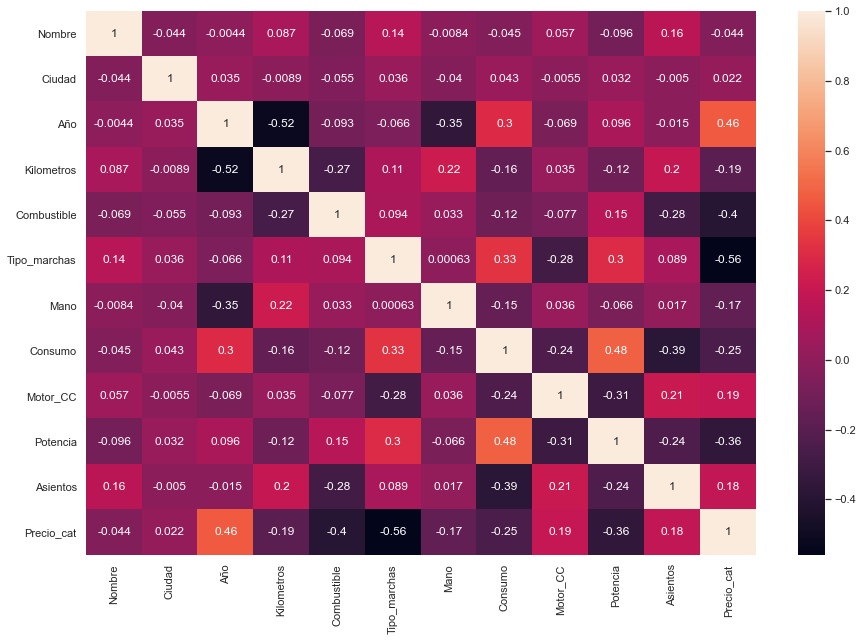

In [3]:
matriz_correlacion = data_trainCopia.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(matriz_correlacion, annot=True)
plt.show()

In [4]:
#Subida 20
lgbm = lgb.LGBMClassifier(objective='regression_l1',n_estimators=180, n_jobs=2, learning_rate=0.07, num_leaves=35)
lgbmEntrenado = lgbm.fit(data_trainCopia, target_train)
preLgb = lgbmEntrenado.predict(data_testCopia)

scores = cross_val_score(lgbmEntrenado, atributos, target_train, cv=5, scoring='accuracy')
print("Score Validacion Cruzada", np.mean(scores)*100)

Score Validacion Cruzada 82.62101935555431


In [6]:
#Subida 21
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=40, sampling_strategy='majority', replacement=False)
Xu, yu = rus.fit_resample(data_trainCopia, target_train)

#Bagging meta-estimator
bagging = BaggingClassifier(RandomForestClassifier(), n_estimators=180, n_jobs=4)
bagEntrenado = bagging.fit(Xu, yu)
preBag = bagEntrenado.predict(data_testCopia)

scores = cross_val_score(bagEntrenado, atributos, target_train, cv=5, scoring='accuracy')
print("Score Validacion Cruzada", np.mean(scores)*100)

Score Validacion Cruzada 81.820309467029


In [18]:
#Subida 22
lgbm = lgb.LGBMClassifier(learning_rate=0.06, objective='regression_l1', n_estimators=410, n_jobs=2, num_leaves=10, max_depth=5)
lgbmEntrenado = lgbm.fit(data_trainCopia, target_train)
preKnn = lgbmEntrenado.predict(data_testCopia)


scores = cross_val_score(lgbmEntrenado, atributos, target_train, cv=5, scoring='accuracy')
print("Score Validacion Cruzada", np.mean(scores)*100)

Score Validacion Cruzada 83.54791192945483


In [19]:
#Subida 23
lgbm = lgb.LGBMClassifier(learning_rate=0.06, objective='regression_l1', n_estimators=420, n_jobs=2, num_leaves=10, max_depth=5)
lgbmEntrenado = lgbm.fit(data_trainCopia, target_train)
preKnn = lgbmEntrenado.predict(data_testCopia)


scores = cross_val_score(lgbmEntrenado, atributos, target_train, cv=5, scoring='accuracy')
print("Score Validacion Cruzada", np.mean(scores)*100)

Score Validacion Cruzada 83.75852698130997


In [20]:
#Subida 24
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=40, sampling_strategy='majority', replacement=False)
Xu, yu = rus.fit_resample(data_trainCopia, target_train)

lgbm = lgb.LGBMClassifier(learning_rate=0.06, objective='regression_l1', n_estimators=420, n_jobs=2, num_leaves=10, max_depth=5)
lgbmEntrenado = lgbm.fit(Xu, yu)
preKnn = lgbmEntrenado.predict(data_testCopia)


scores = cross_val_score(lgbmEntrenado, atributos, target_train, cv=5, scoring='accuracy')
print("Score Validacion Cruzada", np.mean(scores)*100)

Score Validacion Cruzada 83.75852698130997


In [21]:
#Subida 25
lgbm = lgb.LGBMClassifier(learning_rate=0.055, objective='binary', n_estimators=460, n_jobs=2, num_leaves=10, max_depth=-1,seed=46000)
lgbmEntrenado = lgbm.fit(data_trainCopia, target_train)
preKnn = lgbmEntrenado.predict(data_testCopia)


scores = cross_val_score(lgbmEntrenado, atributos, target_train, cv=5, scoring='accuracy')
print("Score Validacion Cruzada", np.mean(scores)*100)

Score Validacion Cruzada 83.37931340469191


In [22]:
#Subida 26
lgbm = lgb.LGBMClassifier(learning_rate=0.045, objective='binary', n_estimators=400, n_jobs=2, num_leaves=10, max_depth=-1,seed=46000)
lgbmEntrenado = lgbm.fit(data_trainCopia, target_train)
preKnn = lgbmEntrenado.predict(data_testCopia)


scores = cross_val_score(lgbmEntrenado, atributos, target_train, cv=5, scoring='accuracy')
print("Score Validacion Cruzada", np.mean(scores)*100)

Score Validacion Cruzada 83.379158116577


In [23]:
#Subida 27
lgbm = lgb.LGBMClassifier(learning_rate=0.055, objective='binary', n_estimators=450, n_jobs=2, num_leaves=10, max_depth=-1,seed=46000)
lgbmEntrenado = lgbm.fit(data_trainCopia, target_train)
preKnn = lgbmEntrenado.predict(data_testCopia)


scores = cross_val_score(lgbmEntrenado, atributos, target_train, cv=5, scoring='accuracy')
print("Score Validacion Cruzada", np.mean(scores)*100)

Score Validacion Cruzada 83.54782319338916


In [7]:
dfAux = pd.DataFrame({'id':data_test['id']})
dfAux.set_index('id', inplace=True)
dfFinal = pd.DataFrame({'id': data_test['id'], 'Precio_cat': preLgb}, columns=['id', 'Precio_cat'])
dfFinal.set_index('id', inplace=True)
dfFinal.to_csv("./soluciones/solucionNOCHE16.csv")